# **Credit Card Applications Approval Project**
___
## **Partial Implementation starts here**

In [ ]:
# uploading the dataset from local machine to the notebook
 
from google.colab import files
uploaded = files.upload()

Saving crx.data to crx.data


In [ ]:
# importing the required libraries

import pandas as pd # for data manipulation and analysis
import numpy as np # provides us with collections of math functions and properties (we'll be using np.NaN in this project)
import matplotlib.pyplot as plt # for creating different types of plots
from pylab import rcParams # for defining and configuring the figure sizes in matplotlib
import seaborn as sns # for drawing statistical graphics - data visualization
from sklearn.metrics import confusion_matrix # to describe the performance of a classification model

In [ ]:
# creating the required dataframes for data cleaning and preprocessing purposes
# importing the data from the file crx.data where the dataset is present
read_file = pd.read_csv ('crx.data',header=None)

# Adding descriptive names for each column in the dataset
read_file.columns = ['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income','Approved']

# write the dataframe(read_file) into the file credit.csv
read_file.to_csv ('credit.csv', index=None)

In [ ]:
# creating a new dataframe(credit) from the credit.csv file; which contains
# the same dataset present in crx.data but with descriptive column names
credit = pd.read_csv('credit.csv')

# Taking a peek of the first five values of the newly created dataframe
# if everything works fine
credit.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
# Checking the number of approved and denied applications
# - => denied applications
# + => approved applications

credit['Approved'].value_counts()

-    383
+    307
Name: Approved, dtype: int64

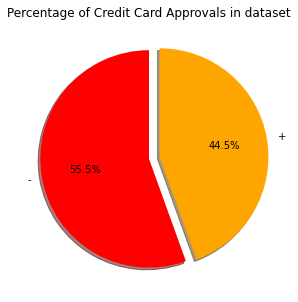

In [ ]:
# Plotting the amount of approvals and denials as a pie chart
data_size = credit['Approved'].value_counts(sort=True)
colors = ['red','orange']
rcParams['figure.figsize'] = 5, 5

# For plotting
labels = '-', '+'
explode = (0, 0.1) # amount of bulging of each slice
plt.pie(data_size, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of Credit Card Approvals in dataset') # adding a title to our plot
plt.show() 

In [ ]:
# Print summary statistics
credit_description = credit.describe()
print(credit_description)
 
print("\n")
 
# Print DataFrame information
credit_info = credit.info()
print(credit_info)
 
print("\n")
 
# Inspect missing values in the dataset
credit.tail(17)

             Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [ ]:
# Replacing each ? with the NaN value in the credit dataframe
credit.replace('?', np.NaN, inplace=True)

In [ ]:
# Converting the object type values of columns "Age" and "Zipcode" to numeric type
credit["Age"] = pd.to_numeric(credit["Age"])
credit["ZipCode"] = pd.to_numeric(credit["ZipCode"])

In [ ]:
credit.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [ ]:
# Replacing the NaN values filled in the previous step with the mean value of the respective column
credit.fillna(credit.mean(), inplace=True)

In [ ]:
# Checking the number of missing values in each column
credit.isnull().sum()

Gender            12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode            0
Income             0
Approved           0
dtype: int64

In [ ]:
# Replacing the NaN values belonging to object type columns with the mode(most frequently occurring value) of the respective columns
def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, then we impute the NaN values with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
            print(df[col].mode())
imputeWithMode(credit)

0    b
dtype: object
0    u
dtype: object
0    g
dtype: object
0    c
dtype: object
0    v
dtype: object
0    t
dtype: object
0    f
dtype: object
0    f
dtype: object
0    g
dtype: object
0    -
dtype: object


In [ ]:
# Checking the number of missing values in each column of the dataframe(credit)
credit.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [ ]:
# Creating a new dataframe(credit_drop) which is same as the credit dataframe except that
# here the column "Zipcode" is dropped(or not present)
credit_drop=credit.drop(["ZipCode"],axis=1)

In [ ]:
# Converting the labels into numeric form so as to convert it into the machine-readable form. 
# Machine learning algorithms can then decide in a better way on how those labels must be operated.

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in credit_drop:
    if credit_drop[col].dtypes=='object':
        credit_drop[col]=LE.fit_transform(credit_drop[col])

In [ ]:
credit_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   EducationLevel  690 non-null    int64  
 6   Ethnicity       690 non-null    int64  
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    int64  
 13  Income          690 non-null    int64  
 14  Approved        690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


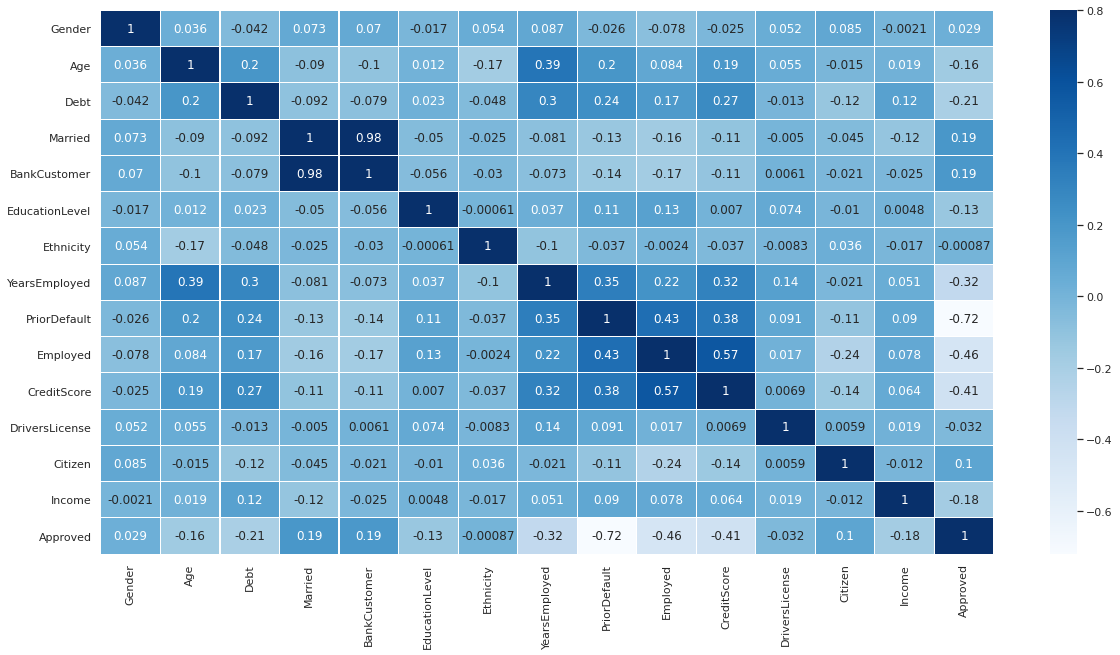

In [ ]:
# Correlation Plot - to know the relationship between different parameters(columns) of our dataset 
# A correlation matrix is a table showing correlation coefficients between variables. 
# Each cell in the table shows the correlation between two variables.

corr_matrix = credit_drop.corr()
f, ax = plt.subplots(figsize=(20, 10))

#Draw the heatmap using seaborn
sns.heatmap(corr_matrix, linewidths=0.1,  cmap = plt.cm.Blues, linecolor = 'White', vmax=0.8, annot=True)

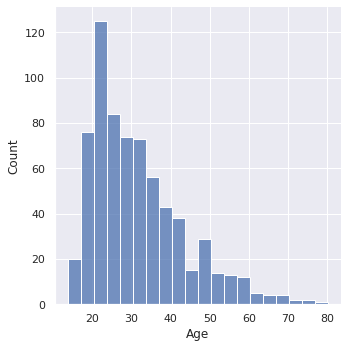

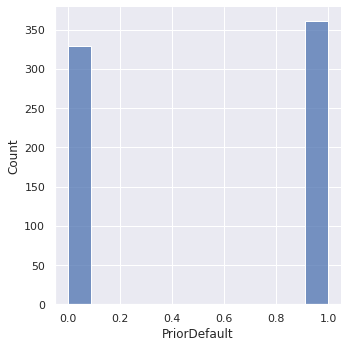

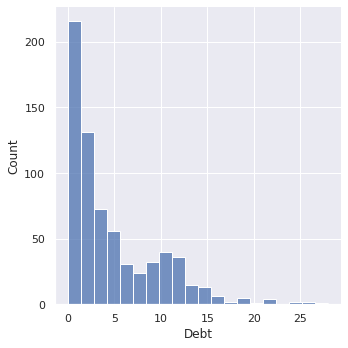

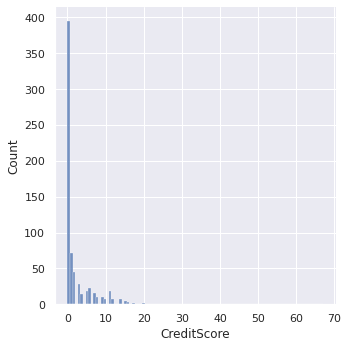

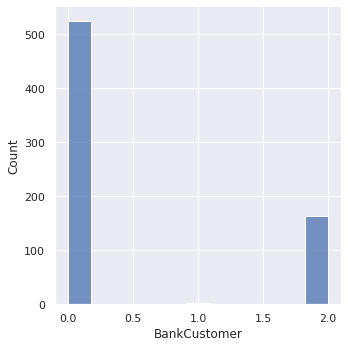

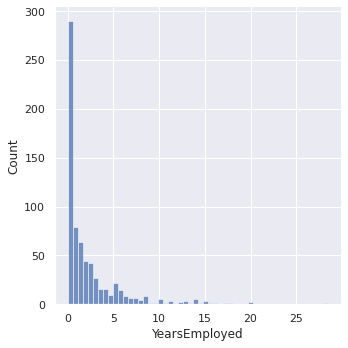

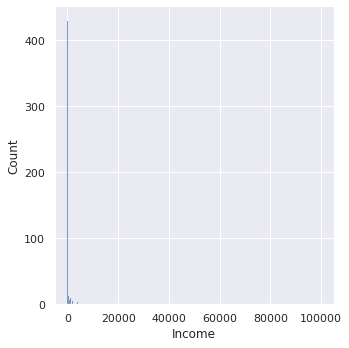

<Figure size 360x360 with 0 Axes>

In [ ]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.displot(col)
    plt.show()
plotDistPlot(credit_drop['Age'])
plotDistPlot(credit_drop['PriorDefault'])
plotDistPlot(credit_drop['Debt'])
plotDistPlot(credit_drop['CreditScore'])
plotDistPlot(credit_drop['BankCustomer'])
plotDistPlot(credit_drop['YearsEmployed'])
plotDistPlot(credit_drop['Income'])
plt.savefig('/content/Distribution.png')

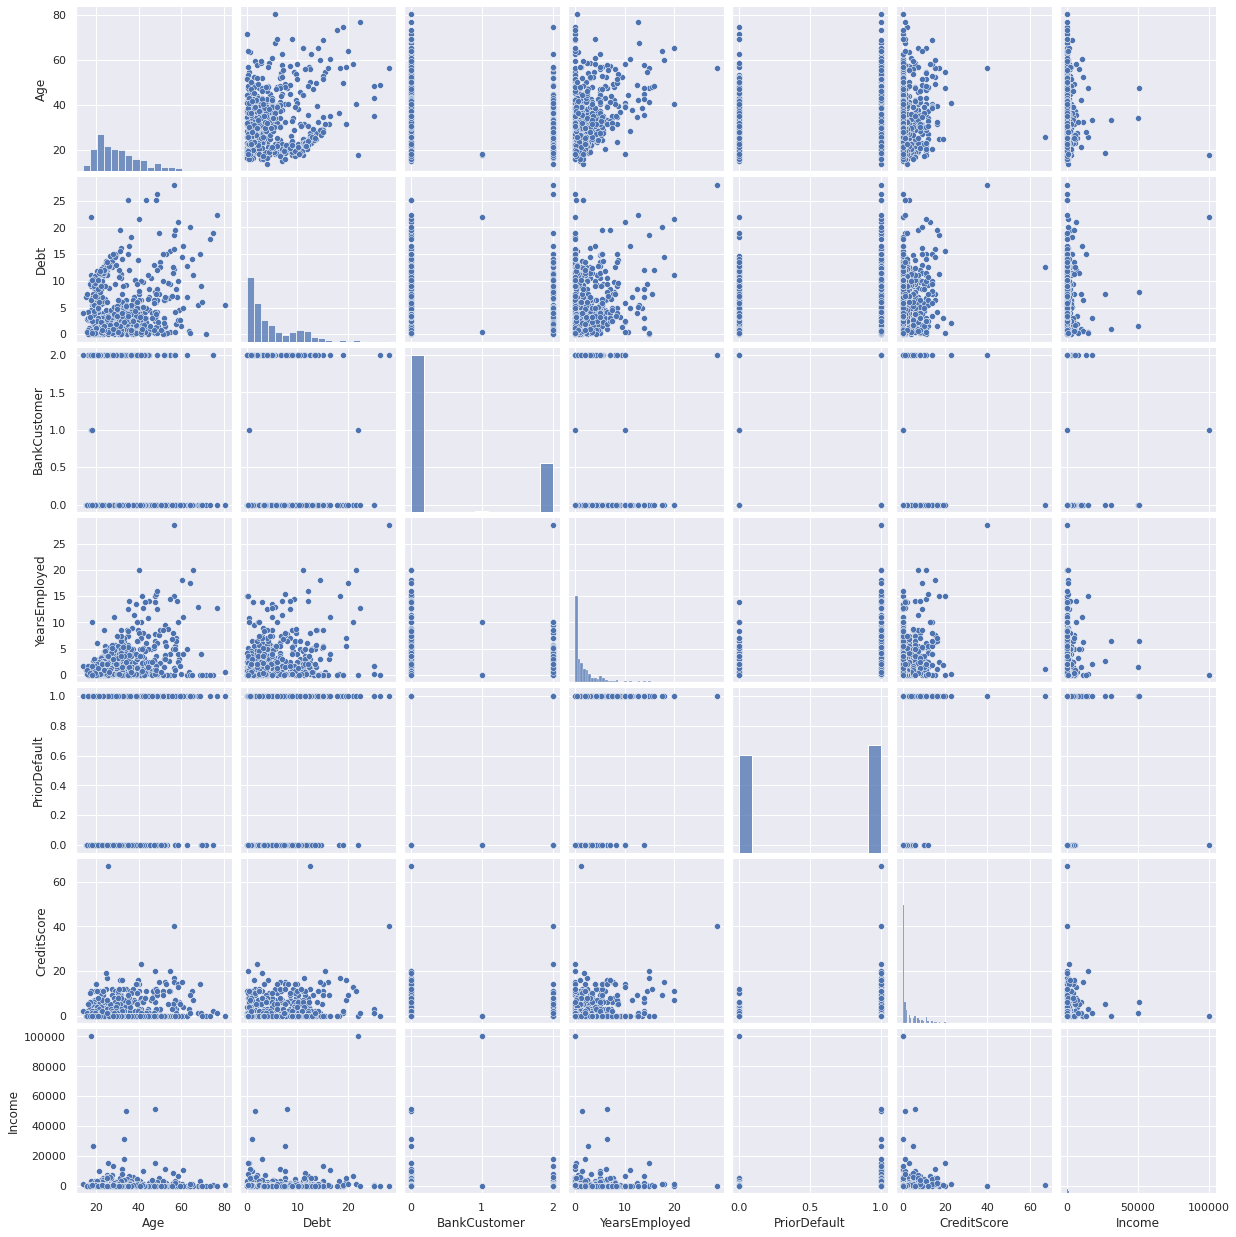

<Figure size 360x360 with 0 Axes>

In [ ]:
#scatterplot - to know how the data is distributed in ourdataset
sns.set()
cols = ['Age', 'Debt', 'BankCustomer','YearsEmployed','PriorDefault','CreditScore','Income']
sns.pairplot(credit_drop[cols], height= 2.5)
plt.show();
plt.savefig('/content/scatterplot.jpg')

In [ ]:
# gives the correlation between the column "Approved" and all other columns
credit_drop.corr()['Approved']

# Prior Default is the failure to repay a debt, including interest or principal, on a loan or security. 
# A default can occur when a borrower is unable to make timely payments, misses payments, or avoids or stops making payments.
# This parameter has the most negative correlation with the approval of an application

Gender            0.028934
Age              -0.161627
Debt             -0.206294
Married           0.194306
BankCustomer      0.185134
EducationLevel   -0.130434
Ethnicity        -0.000866
YearsEmployed    -0.322475
PriorDefault     -0.720407
Employed         -0.458301
CreditScore      -0.406410
DriversLicense   -0.031625
Citizen           0.100867
Income           -0.175657
Approved          1.000000
Name: Approved, dtype: float64

In [ ]:
credit_drop.corr()['Approved'].abs() > 0.15

Gender            False
Age                True
Debt               True
Married            True
BankCustomer       True
EducationLevel    False
Ethnicity         False
YearsEmployed      True
PriorDefault       True
Employed           True
CreditScore        True
DriversLicense    False
Citizen           False
Income             True
Approved           True
Name: Approved, dtype: bool

In [ ]:
# Splitting the data set into test and train data for training and testing the model
from sklearn.model_selection import train_test_split

X,y = credit_drop.iloc[:,credit_drop.columns != 'Approved'] , credit_drop["Approved"]

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.3,random_state=1)

feature_names=[i for i in credit_drop.columns if i!= 'Approved']

In [ ]:
X_train

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income
616,1,22.67,0.750,1,0,6,7,1.585,0,1,1,1,0,9
618,1,29.58,4.750,1,0,9,7,2.000,0,1,1,1,0,68
238,1,42.83,4.625,1,0,10,7,4.580,1,0,0,0,2,0
523,0,22.50,8.500,1,0,10,7,1.750,1,1,10,0,0,990
425,1,24.58,1.250,1,0,1,7,0.250,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,1,41.17,4.040,1,0,2,3,7.000,1,1,8,0,0,0
471,1,21.08,4.125,2,2,6,3,0.040,0,0,0,0,0,100
309,0,31.75,3.000,2,2,7,4,0.000,0,0,0,0,0,20
455,1,36.17,18.125,1,0,12,7,0.085,0,0,0,0,0,3552


In [ ]:
rescaledX_train

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income
0,1.0,0.115243,0.026786,0.5,0.0,0.461538,0.875,0.055614,0.0,1.0,0.025,1.0,0.0,0.00009
1,1.0,0.221420,0.169643,0.5,0.0,0.692308,0.875,0.070175,0.0,1.0,0.025,1.0,0.0,0.00068
2,1.0,0.425015,0.165179,0.5,0.0,0.769231,0.875,0.160702,1.0,0.0,0.000,0.0,1.0,0.00000
3,0.0,0.112631,0.303571,0.5,0.0,0.769231,0.875,0.061404,1.0,1.0,0.250,0.0,0.0,0.00990
4,1.0,0.144591,0.044643,0.5,0.0,0.076923,0.875,0.008772,0.0,0.0,0.000,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,1.0,0.399508,0.144286,0.5,0.0,0.153846,0.375,0.245614,1.0,1.0,0.200,0.0,0.0,0.00000
479,1.0,0.090811,0.147321,1.0,1.0,0.461538,0.375,0.001404,0.0,0.0,0.000,0.0,0.0,0.00100
480,0.0,0.254763,0.107143,1.0,1.0,0.538462,0.500,0.000000,0.0,0.0,0.000,0.0,0.0,0.00020
481,1.0,0.322680,0.647321,0.5,0.0,0.923077,0.875,0.002982,0.0,0.0,0.000,0.0,0.0,0.03552


In [ ]:
# Splitting the data set into test and train data for training and testing the model

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [ ]:
rescaledX_train = pd.DataFrame(rescaledX_train, columns = feature_names)
rescaledX_test = pd.DataFrame(rescaledX_test, columns = feature_names)

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Accuracy of logistic regression classifier: ", logreg.score(X_test,y_test))
print('Confusion matrix: ', confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  0.8743961352657005
Confusion matrix:  [[83  9]
 [17 98]]


# **Partial Implementation stops here**
---



In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol= tol, max_iter= max_iter)

In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.840580 using {'max_iter': 100, 'tol': 0.01}


In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy of Random Forest classifier: ", rf.score(X_test, y_test))
# Evaluate the confusion_matrix
print('Confusion matrix: ', confusion_matrix(y_test,y_pred))

Accuracy of Random Forest classifier:  0.8743961352657005
Confusion matrix:  [[ 79  13]
 [ 13 102]]


Feature ranking:
1. feature 5 (0.265333)
2. feature 4 (0.098326)
3. feature 7 (0.096792)
4. feature 8 (0.093077)
5. feature 2 (0.082149)
6. feature 1 (0.080172)
7. feature 6 (0.048732)
8. feature 0 (0.015514)
9. feature 34 (0.013989)
10. feature 33 (0.013398)
11. feature 17 (0.011244)
12. feature 38 (0.011089)
13. feature 30 (0.010821)
14. feature 29 (0.010787)
15. feature 13 (0.010732)
16. feature 20 (0.009719)
17. feature 25 (0.009667)
18. feature 3 (0.009341)
19. feature 11 (0.009038)
20. feature 10 (0.008971)
21. feature 24 (0.008695)
22. feature 18 (0.008632)
23. feature 22 (0.008370)
24. feature 28 (0.007747)
25. feature 14 (0.007697)
26. feature 26 (0.007214)
27. feature 12 (0.006299)
28. feature 27 (0.006062)
29. feature 31 (0.005770)
30. feature 21 (0.005025)
31. feature 15 (0.004675)
32. feature 16 (0.003644)
33. feature 9 (0.003042)
34. feature 36 (0.002800)
35. feature 39 (0.001494)
36. feature 35 (0.001140)
37. feature 19 (0.001125)
38. feature 32 (0.000913)
39. feature 37

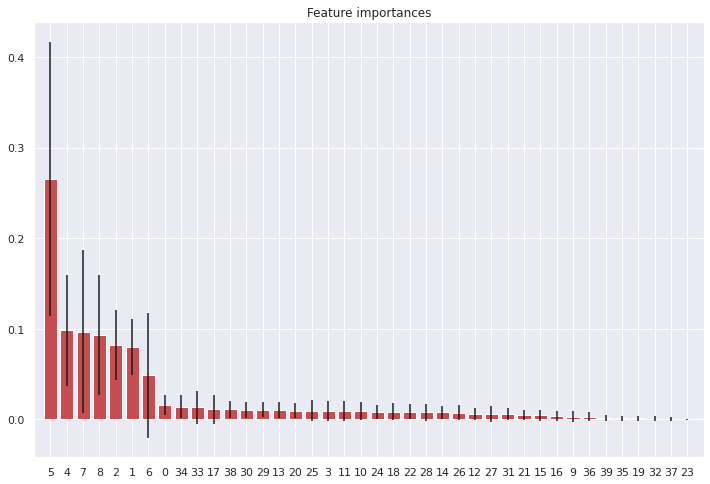

<Figure size 360x360 with 0 Axes>

In [ ]:

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
plt.savefig('featureimportance.jpg')


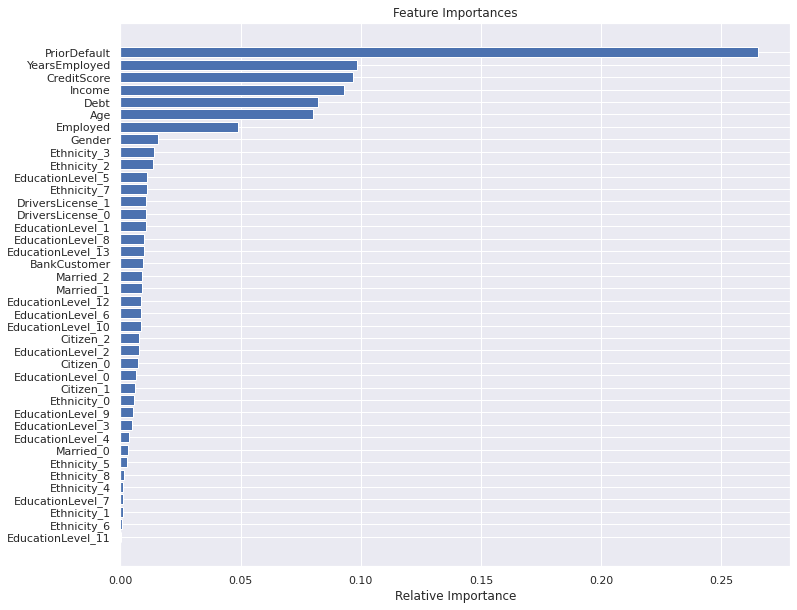

<Figure size 50400x7200 with 0 Axes>

In [ ]:
credit_dummies = credit_dummies.drop(['Approved'], axis=1)
features = credit_dummies.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.figure(figsize=(700,100))
plt.savefig('features.jpg')

In [ ]:
#decision trees
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of Decision Tree Classifier: ", clf.score(X_test, y_test))
print('Confusion matrix: ', confusion_matrix(y_test,y_pred))

Accuracy of Decision Tree Classifier:  0.8164251207729468
Confusion matrix:  [[73 19]
 [19 96]]


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


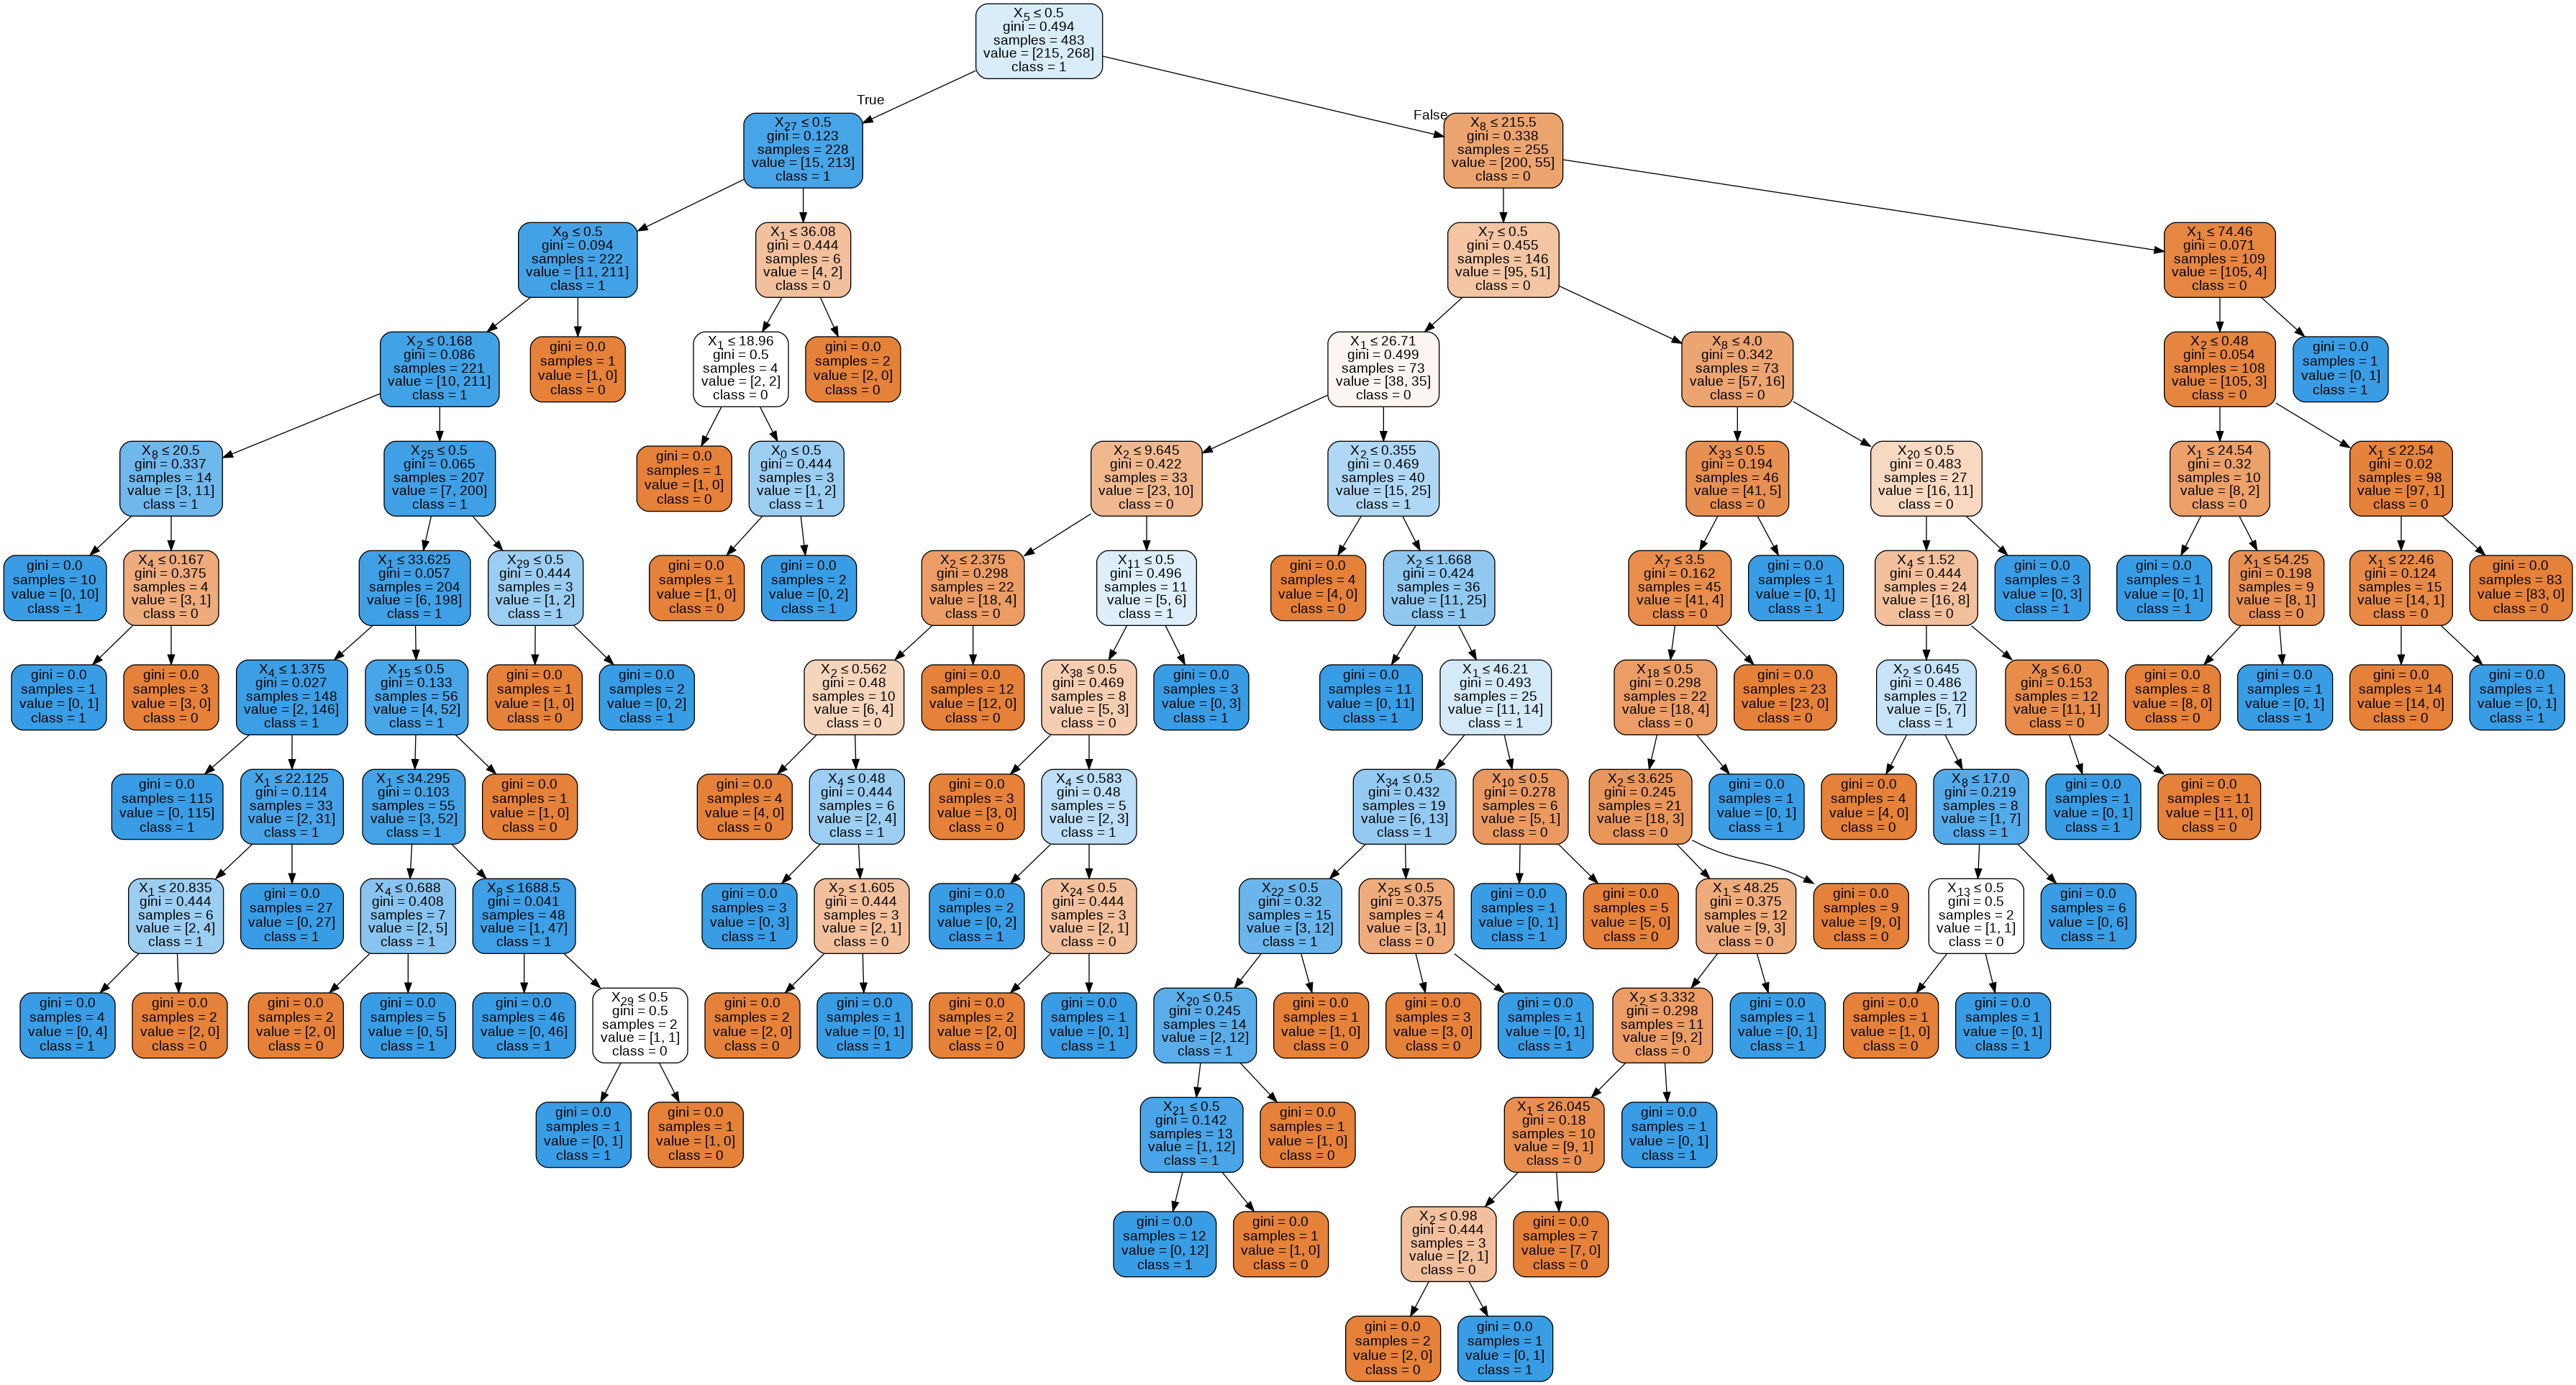

In [ ]:
#graphing the decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import display, Image
import pydotplus

feature_cols = ['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','Citizen','Income','DriversLicense', 'ZipCode']

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
                filled=True, rounded=True,
               special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('credit.png')
Image(graph.create_png())

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy of K Nearest Neighbors Classifier: ", knn.score(X_test, y_test))
print('Confusion matrix: ', confusion_matrix(y_test,y_pred))

Accuracy of K Nearest Neighbors Classifier:  0.6908212560386473
Confusion matrix:  [[51 41]
 [23 92]]
